In [1]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

import os
data = pd.read_csv("parkinsons_updrs.data.csv")

In [2]:
import sklearn.ensemble

In [3]:
X = data.drop(["total_UPDRS"], axis=1) 
y = data.total_UPDRS.values

In [4]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [6]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred_randomforest_train = regressor.predict(x_train)
y_pred_randomforest_test = regressor.predict(x_test)

In [7]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation


accuracy_randomforest_train = r2_score(y_train, y_pred_randomforest_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_randomforest_train)

accuracy_randomforest_test = r2_score(y_test, y_pred_randomforest_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_randomforest_test)

RMSE_randomforest_train = sqrt(mean_squared_error(y_train, y_pred_randomforest_train))
print("RMSE for Training Data: ", RMSE_randomforest_train)

RMSE_randomforest_test = sqrt(mean_squared_error(y_test, y_pred_randomforest_test))
print("RMSE for Testing Data: ", RMSE_randomforest_test)

Training Accuracy for Random Forest Regression Model:  0.9998384851108377
Testing Accuracy for Random Forest Regression Model:  0.9992437428289642
RMSE for Training Data:  0.13650980439073923
RMSE for Testing Data:  0.2894877521688


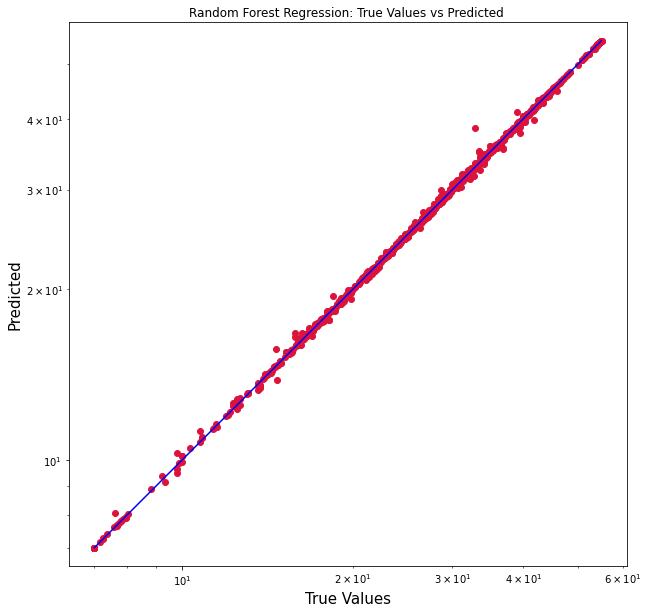

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_randomforest_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_randomforest_test), max(y_test))
p2 = min(min(y_pred_randomforest_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Random Forest Regression: True Values vs Predicted ")
plt.axis('equal')
plt.show()